In [10]:
# # Standart
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from tqdm.auto import tqdm

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

# Graphics size
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

# Timeseries
from utils import time_series

In [3]:
# Data
df = pd.read_csv('Test_data/climat.csv')[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'})
print(len(df))
df.head()

1462


,ds,y
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


# Base

### init

In [4]:
# __init__
temperature_ts = time_series.time_series(df)

## Make predict 

### 1. With our params 

In [5]:
# Predict next = 60 days
temperature_ts.set_inteval(60)
# Size of validation data = 60
temperature_ts.set_test_size(60)
# Interval width = 0.95
temperature_ts.set_interval_width(0.95)
# Chouse loss func = MAPE
temperature_ts.set_loss('MAPE')
# Set custom date of test data = 2016-09-24
# temperature_ts.set_custom_test_size('2016-09-24') 
# Set our params of predict model
temperature_ts.set_model_parameters({'changepoint_prior_scale': 0.05,
                                     'seasonality_prior_scale': 0.01,
                                     'holidays_prior_scale': 10.0,
                                     'seasonality_mode': 'multiplicative',
                                     'changepoint_range': 0.8}) 

In [8]:
temperature_ts.init_and_predict_prophet()

Ошибки на валидации:
MSE = 1.883714608873158
MAE = 1.1477554643893764
MAPE = 0.06231012033346914


### 2. With GridSearch

In [7]:
# to hide warnings
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

In [ ]:
temperature_ts.search_params()

In [ ]:
temperature_ts.init_and_predict_prophet()

## <span style="color:red">Show components of ts</span>

## Show graphs

Plot TS

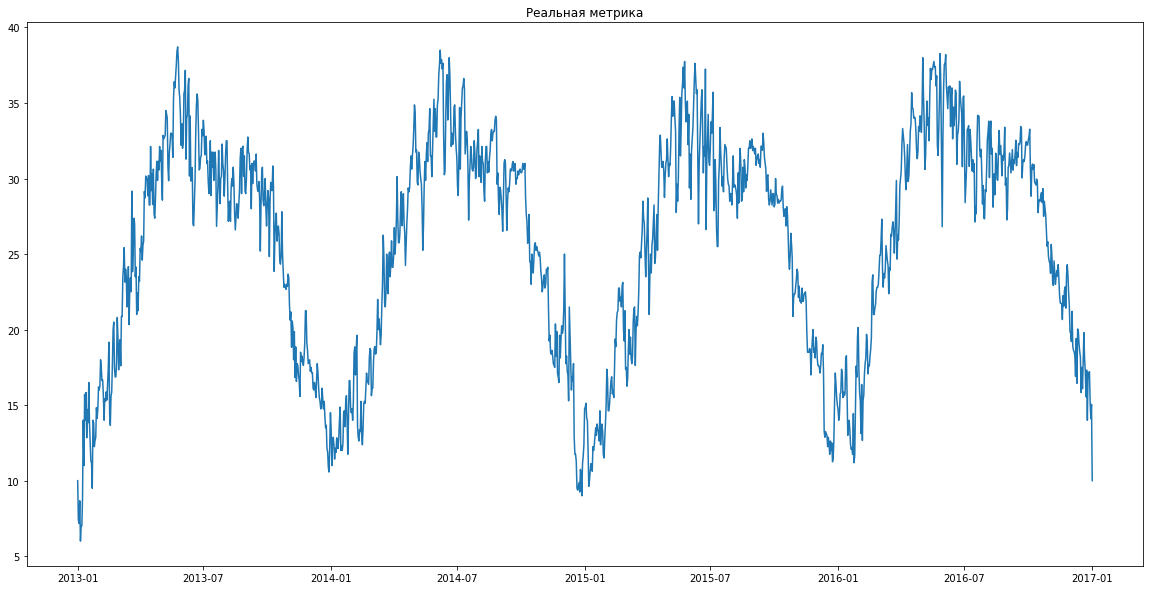

In [11]:
temperature_ts.draw_timeseries()

Plot train and test 

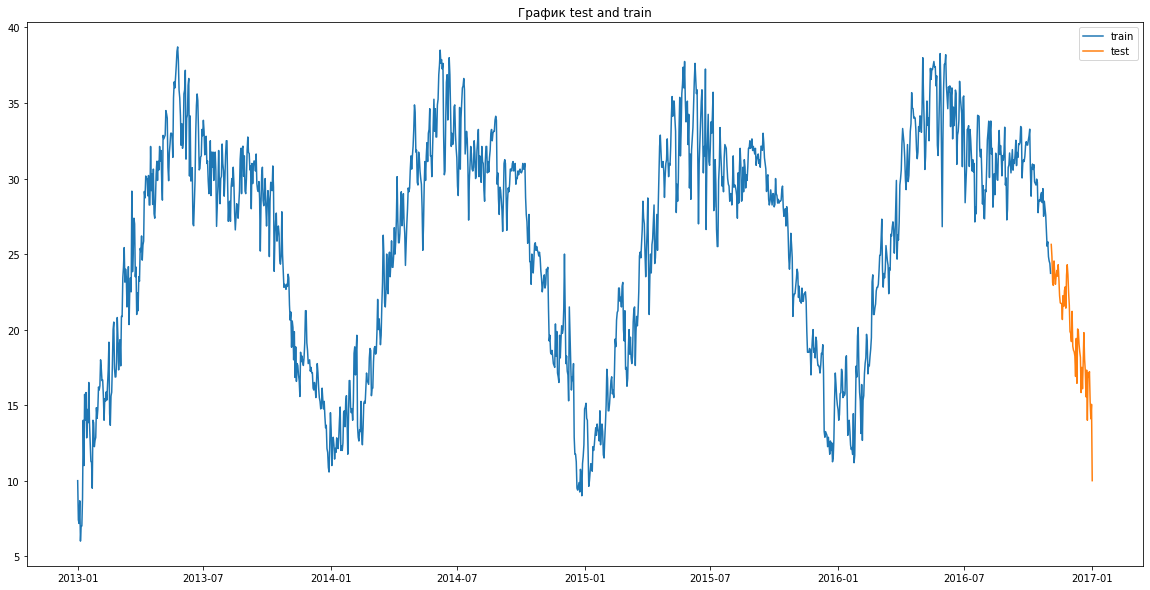

In [12]:
temperature_ts.draw_test_and_train_dataset()

Plot forecast

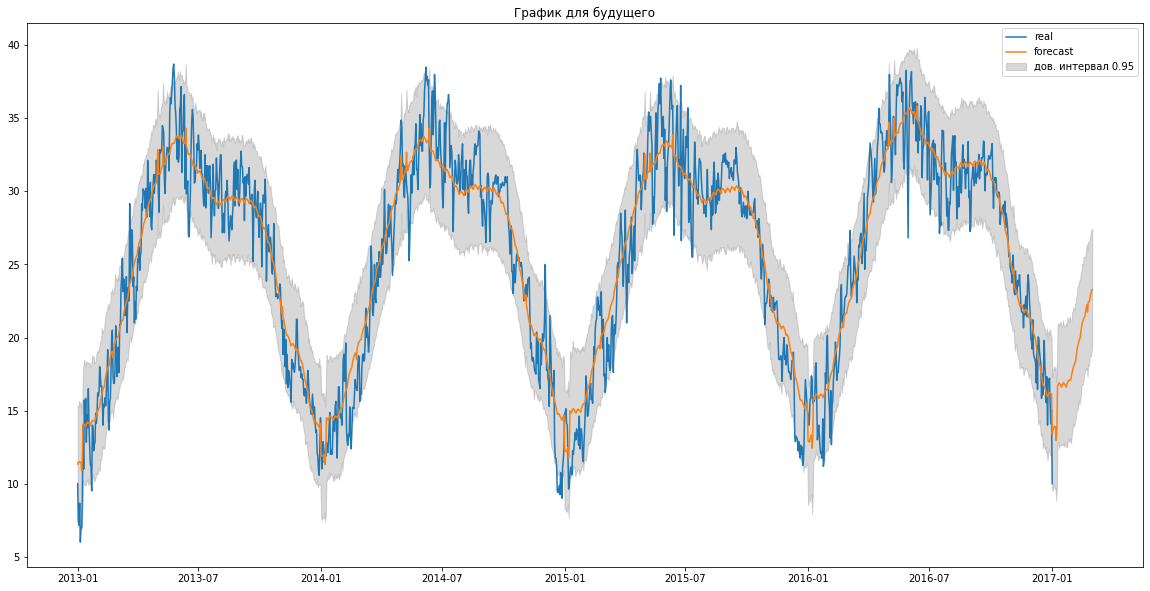

In [13]:
temperature_ts.draw_forecast()

Plot Trend

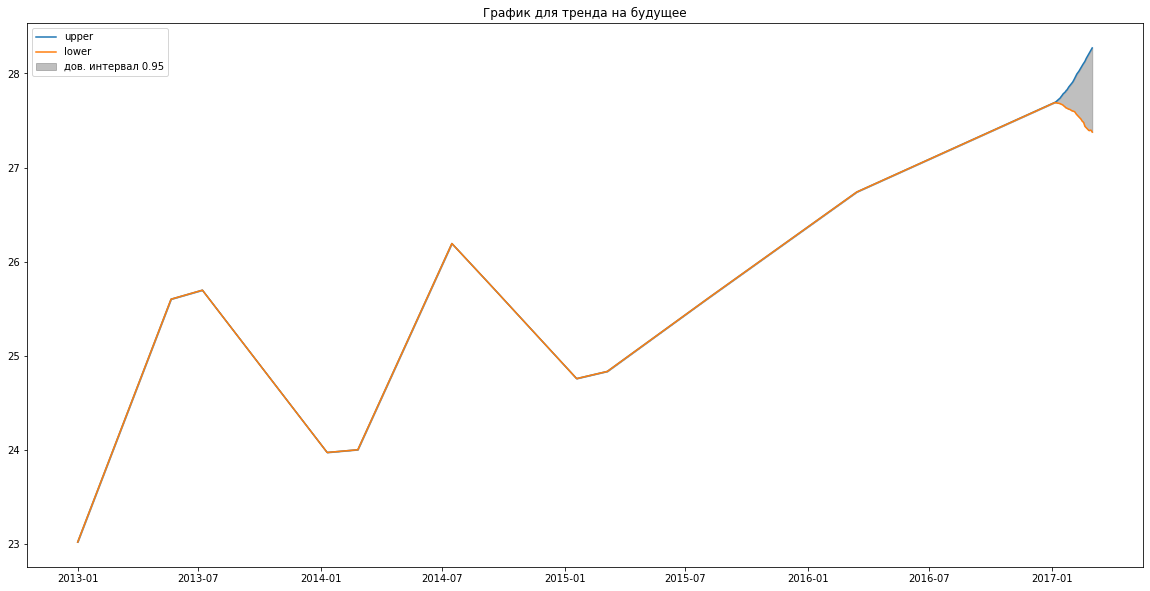

In [14]:
temperature_ts.draw_trend()

Show table on the future Q

In [15]:
temperature_ts.draw_table_of_future_quater_trend()

Ожидаемый прирост в следующем квратале с учетом тренда, исходя из ошибки модели на валидации


,Нижняя граница прогноза,Нижняя граница прогноза (с поправкой на ошибку модели),Нижняя граница прогноза в %,Нижняя граница прогноза (с поправкой на ошибку модели) в %,Верхняя граница прогноза,Верхняя граница прогноза (с поправкой на ошибку модели),Верхняя граница прогноза в %,Верхняя граница прогноза (с поправкой на ошибку модели) в %
0,27.5725,25.8544,0.1564,-6.0844,27.9304,29.6707,1.4564,7.7782


Plot components of the model

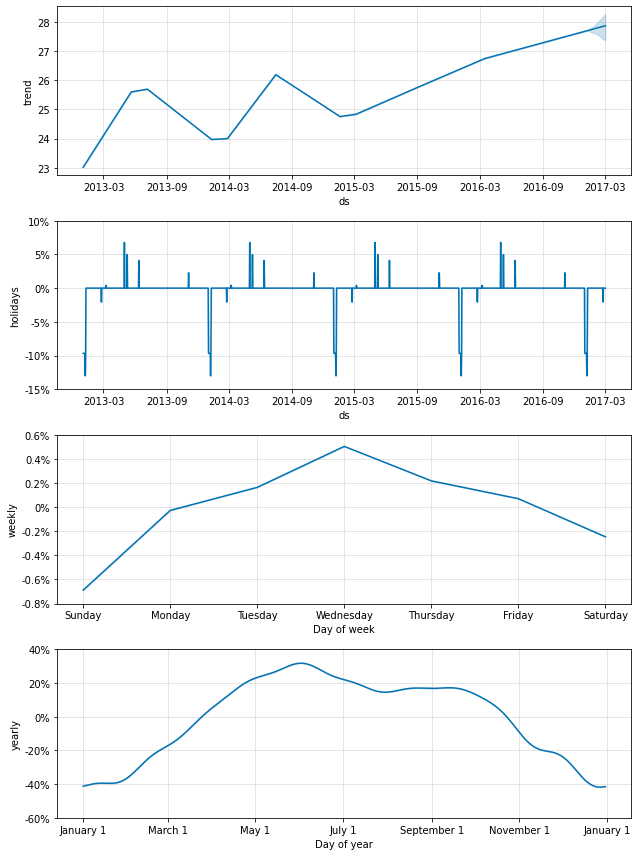

In [16]:
temperature_ts.plot_components()

## Auto_predict

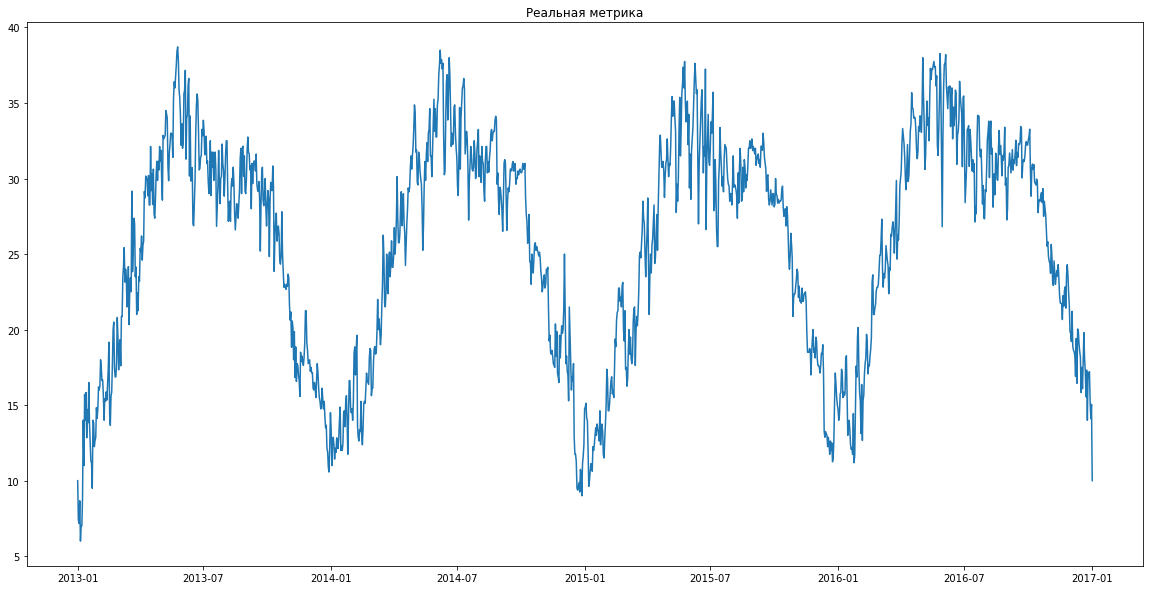

  0%|          | 0/288 [00:00<?, ?it/s]

Ошибки на валидации:
MSE = 1.9941428894100013
MAE = 1.1525661666420277
MAPE = 0.06321014685312652
Текущие параметры после gridSearch:

changepoint_prior_scale = 0.05
seasonality_prior_scale = 0.01
holidays_prior_scale = 10.0
seasonality_mode = multiplicative
changepoint_range = 0.8
Ошибки на валидации:
MSE = 1.9941428894100013
MAE = 1.1525661666420277
MAPE = 0.06321014685312652


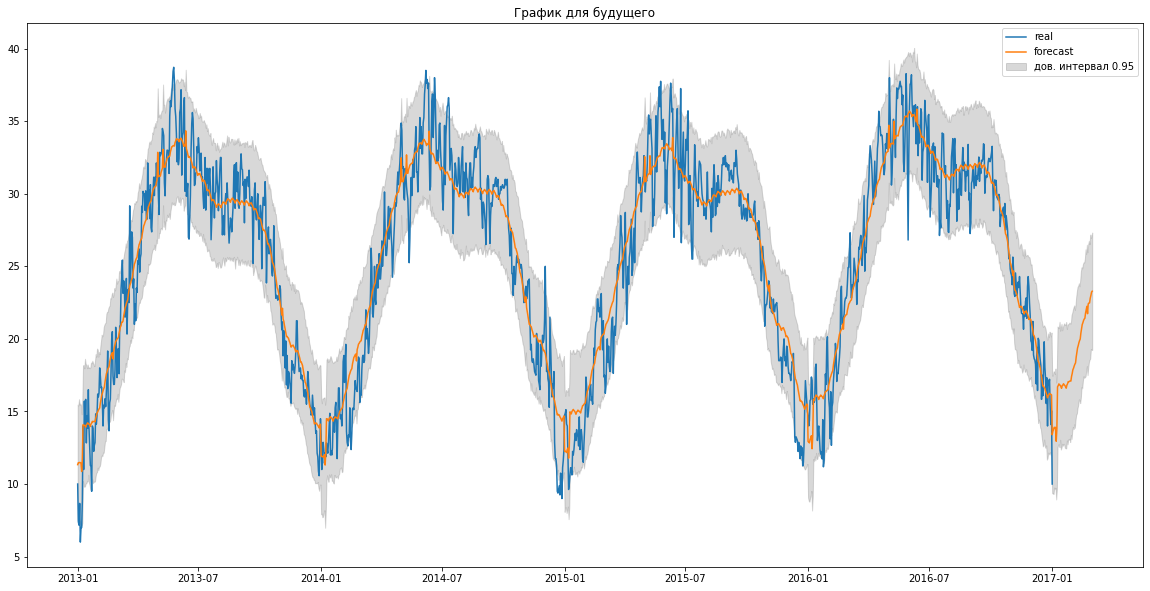

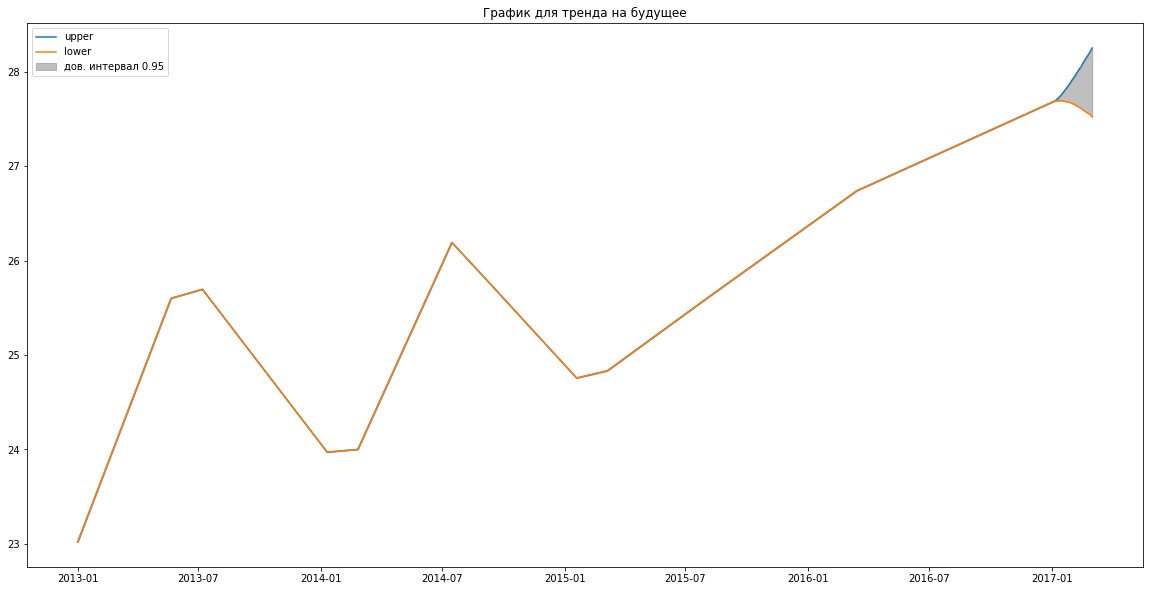

Ожидаемый прирост в следующем квратале с учетом тренда, исходя из ошибки модели на валидации


,Нижняя граница прогноза,Нижняя граница прогноза (с поправкой на ошибку модели),Нижняя граница прогноза в %,Нижняя граница прогноза (с поправкой на ошибку модели) в %,Верхняя граница прогноза,Верхняя граница прогноза (с поправкой на ошибку модели),Верхняя граница прогноза в %,Верхняя граница прогноза (с поправкой на ошибку модели) в %
0,27.6426,25.8953,0.4111,-5.9359,27.9285,29.6938,1.4496,7.8622


In [15]:
temperature_ts.to_vanga()

## Decompose

With unknown period

Лучшая длина периода, основываясь на остатках = 5


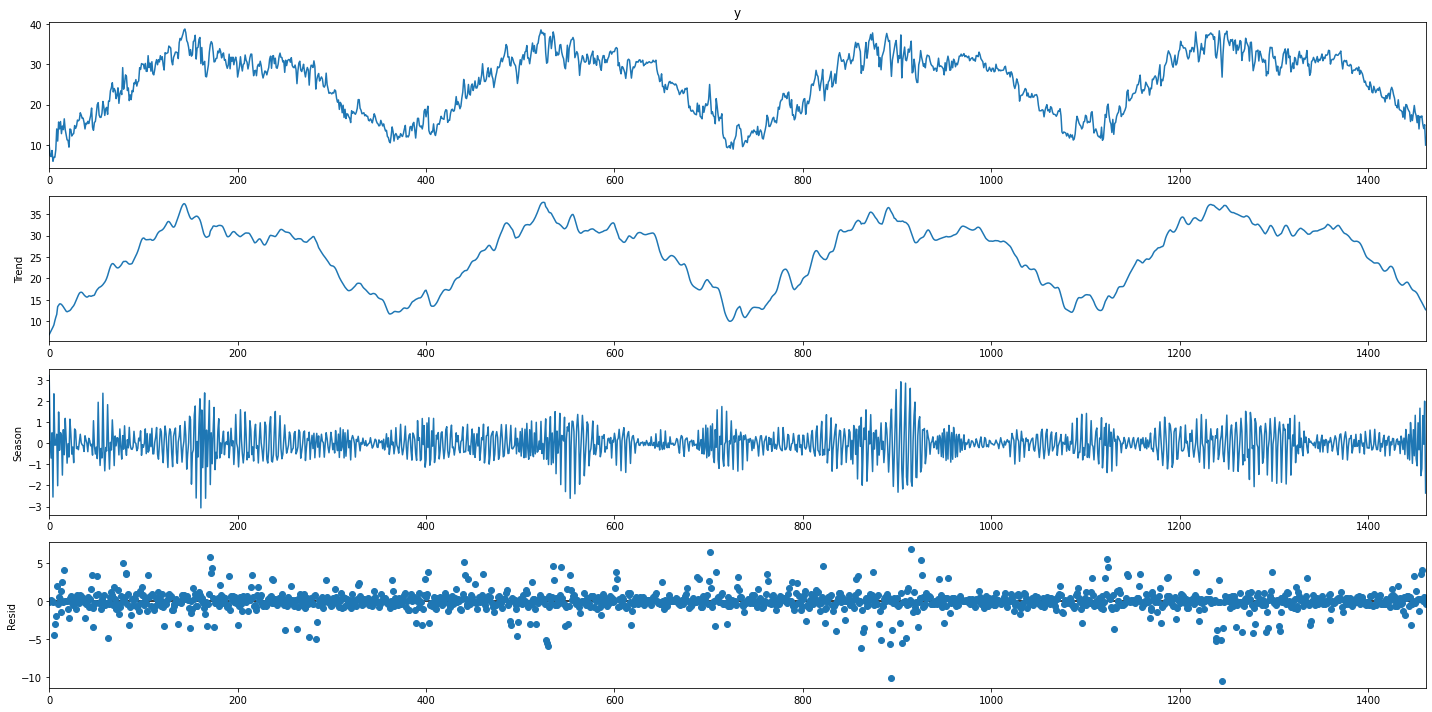

In [22]:
temperature_ts.plot_decompose()

With known period

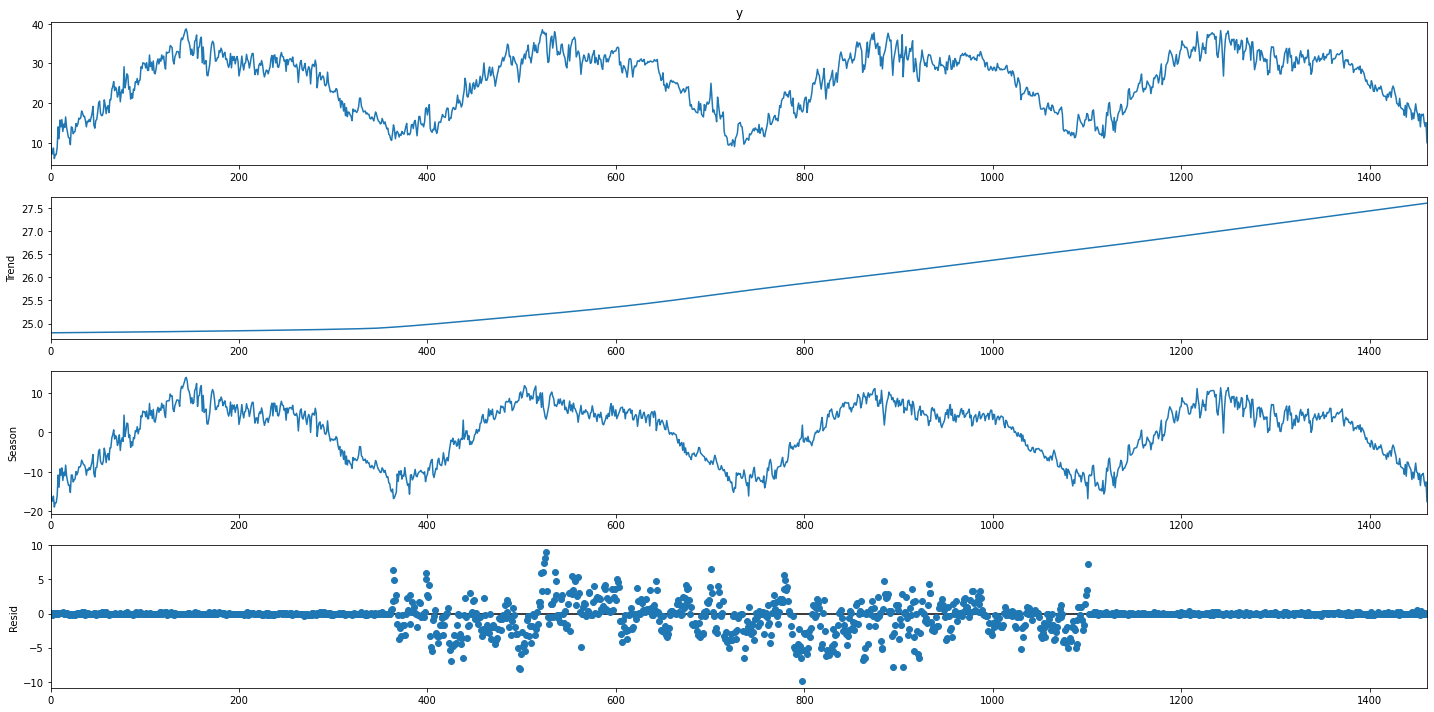

In [20]:
temperature_ts.plot_decompose(period=360, robust=True)

##  Anomalys

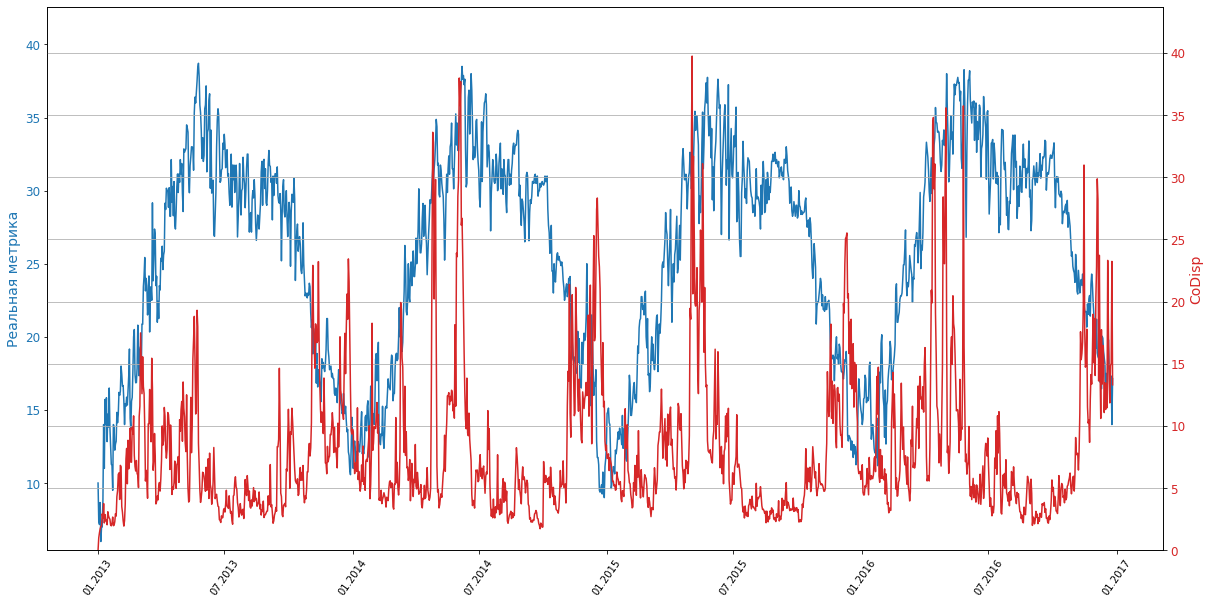

Даты, которые выглядят очень аномально
(Обрезаны по .99 квантилю)
2014-04-26
2014-04-27
2014-06-03
2014-06-04
2014-06-05
2015-05-02
2015-05-03
2015-05-05
2015-05-18
2016-04-12
2016-04-13
2016-04-15
2016-05-01
2016-05-26
2016-11-15


In [15]:
df_with_codisp = temperature_ts.anomalys_dates()